In [1]:
from pathlib import Path
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

In [2]:
train_data = pd.read_csv('train_data.csv')
test_data = pd.read_csv('test_data.csv')

# Insert Revenue and Regret from test_data into train_data
train_data.update(test_data)

# Separate data without DP to make face plots more readable
dp_data = train_data.query('Noise > 0').query('Clip > 0')
no_dp_data = train_data.query('Noise == 0').query('Clip == 0')

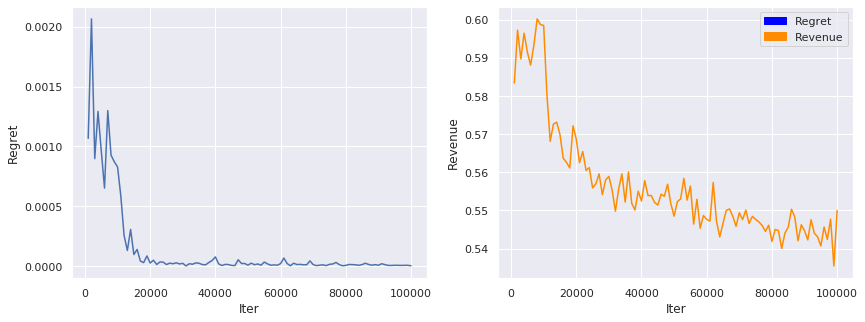

In [3]:
if not no_dp_data.empty:
    sns.set(rc={'figure.figsize':(14,5)})
    v0, ax = plt.subplots(1,2)
    v0 = sns.lineplot(x='Iter', y='Regret', data=no_dp_data, ax=ax[0])
    v0 = sns.lineplot(x='Iter', y='Revenue', data=no_dp_data, color='darkorange', ax=ax[1])
    regret = mpatches.Patch(color='blue', label='Regret')
    revenue = mpatches.Patch(color='darkorange', label='Revenue')
    v0.legend(handles=[regret, revenue])

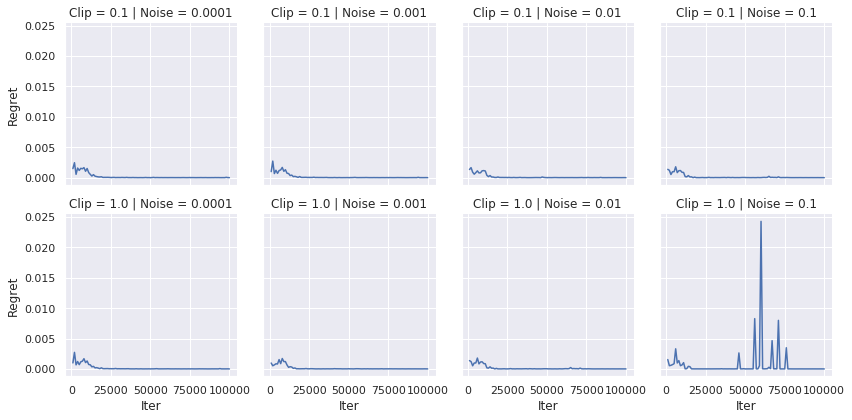

In [4]:
v1 = sns.FacetGrid(dp_data, col='Noise', row='Clip')
v1 = v1.map(plt.plot, 'Iter', 'Regret')

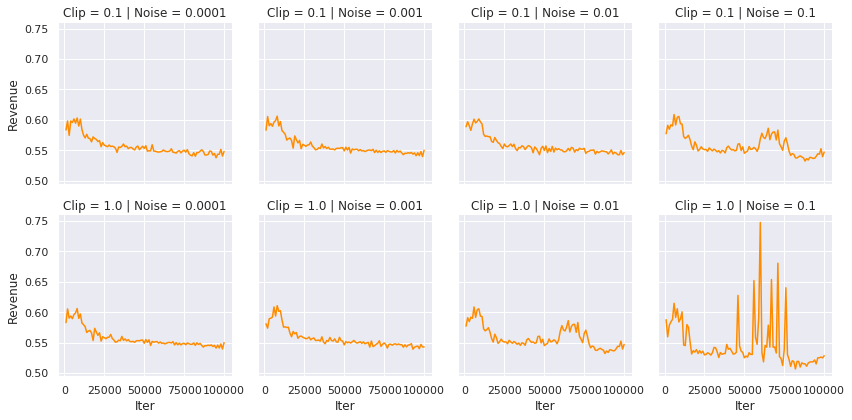

In [5]:
v2 = sns.FacetGrid(dp_data, col='Noise', row='Clip')
v2 = v2.map(plt.plot, 'Iter', 'Revenue', color='darkorange')

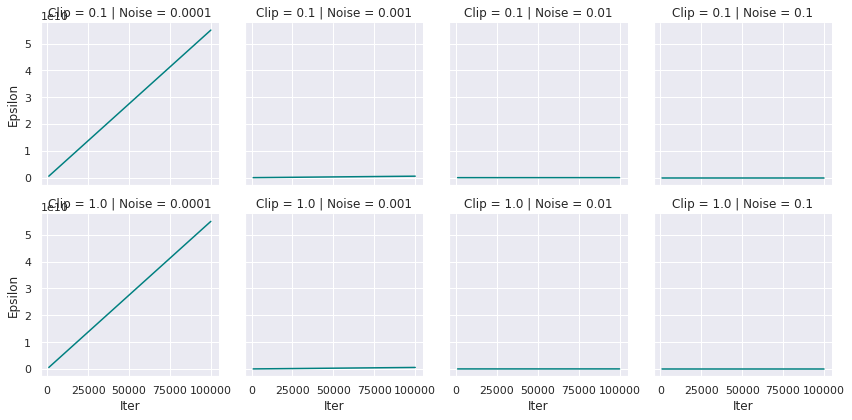

In [6]:
v3 = sns.FacetGrid(dp_data, col='Noise', row='Clip')
v3 = v3.map(plt.plot, 'Iter', 'Epsilon', color='teal')